# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team RR-7#RAVE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA - Twitter Sentiment Classification

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages



In [99]:
# Libraries for data loading, data manipulation, and data visualization
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Library for basic plotting in Python
import seaborn as sns  # Library for statistical data visualization
import plotly.express as px  # Library for interactive visualizations
from IPython.core.display import HTML  # Library for rendering HTML content in Jupyter Notebook
import string

# Libraries for data preparation and model building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [100]:
#Load the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test_with_no_labels.csv")

In [101]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [102]:
df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [103]:
df_train.shape

(15819, 3)

In [104]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [105]:
df_test.shape

(10546, 2)

<a id="three"></a>
## 3. Data Cleaning

| In this section, we performed indepth cleaning of the data |
---


In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [108]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [109]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

### To remove the punction marks, @mentions and special characters, we create a function 

In [110]:
import re

def clean_tweet(twts):
    ''' This function takes a array, list or series like objects containing tweets
        and replace all with empty pace, and convert to lower case
    '''
    
    # to convert to lower case
    twts = twts.lower()
    
    
    # Remove mentions (e.g., @username)
    twts = re.sub(r'@[A-Za-z0-9_]+', '', twts)

    # Remove URLs (e.g., https://example.com)
    twts = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', '', twts)

    # Remove punctuation marks
    twts = re.sub(r'[^\w\s]', '', twts)

    return twts

In [111]:
#df = df_train.copy() # assign the dataframe to a new object

#df = pd.concat([df_train,df_test])

df = df_train

df['message'] = df['message'].apply(clean_tweet)

In [112]:
df_test.message = df_test.message.apply(clean_tweet)

In [113]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt its 2016 and a racist sexist climate chang...,466954


In [114]:
df.tail()

,sentiment,message,tweetid
15814,1,rt they took down the material on global warm...,22001
15815,2,rt how climate change could be breaking up a ...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt hey liberals the climate change crap is a ...,819732
15818,0,rt s climate change equation in 4 screenshots,806319


In [115]:
df.shape

(15819, 3)

In [116]:
# check for duplicate row in the data frame

df.duplicated().sum()

0

In [117]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,rt its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,rt they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,rt how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,rt hey liberals the climate change crap is a hoax that ties to agenda2030\r\nthe climate is being changed byãââ,819732


In [118]:
# Function to remove 'RT' from tweets
def remove_rt(tweet):
    return tweet.replace('rt', '')

# Apply the function to the 'tweets' column
df['message'] = df['message'].apply(remove_rt)

In [119]:
df_test.message = df_test.message.apply(remove_rt)

In [120]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,hey liberals the climate change crap is a hoax that ties to agenda2030\r\nthe climate is being changed byãââ,819732


We noticed that some of the tweets contained non-english characters e.g. ãââ. 

So wrote a function to get rid of them

In [121]:
#removes all non-english (non-ascii) characters
def remove_non_ascii(message):
    return ''.join([l for l in message if l in string.printable])

df['message'] = df['message'].apply(remove_non_ascii)

In [122]:
df_test.message = df_test.message.apply(remove_non_ascii)

#### NOTE: | Our data is relatively clean now we can move on with the EDA section to understand more about the data |

In [123]:
with pd.option_context('display.max_colwidth', None):
  display(df)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what via,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,researchers say we have three years to act on climate change before its too late,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change,573736
4,1,its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954
...,...,...,...
15814,1,they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https,22001
15815,2,how climate change could be breaking up a 200millionyearold relationship,17856
15816,0,notiven nytimesworld what does trump actually believe about climate change rick perry joins other aides in,384248
15817,-1,hey liberals the climate change crap is a hoax that ties to agenda2030\r\nthe climate is being changed by,819732


In [124]:
with pd.option_context('display.max_colwidth', None):
  display(df_test)

,message,tweetid
0,europe will now be looking to china to make sure that it is not alone in fighting climate change,169760
1,combine this with the polling of staffers re climate change and womens rights and you have a fascist state,35326
2,the scary unimpeachable evidence that climate change is already here itstimetochange climatechange,224985
3,\r\nputin got to you too jill \r\ntrump doesnt believe in climate change at all \r\nthinks its s hoax,476263
4,female orgasms cause global warming\r\nsarcastic republican,872928
...,...,...
10541,brb writing a poem about climate change climatechange science poetry fakenews alternativefacts,895714
10542,2016 the year climate change came home during the hottest year on record karl mathiesen travelled to tasmania,875167
10543,pacific countries positive about fiji leading the global climate change conference in november,78329
10544,youre so hot you must be the cause for global warming aldublaboroflove,867455


## 4. Exploratory Data Analysis (EDA)


| In this section, we performed an in-depth analysis of all the variables in the DataFrame. |
---

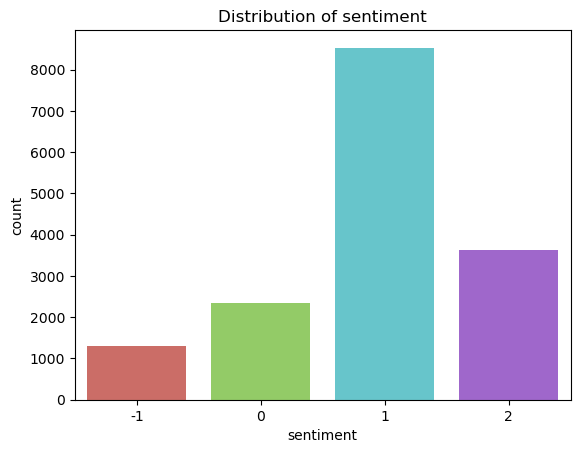

In [125]:
# To visualize the distributon of the sentiments, we plot a count plot and the unique sentiments we have 

sns.countplot(x = 'sentiment', data = df, palette="hls")
plt.title("Distribution of sentiment");

['pro' 'news' 'neutral' 'anti']


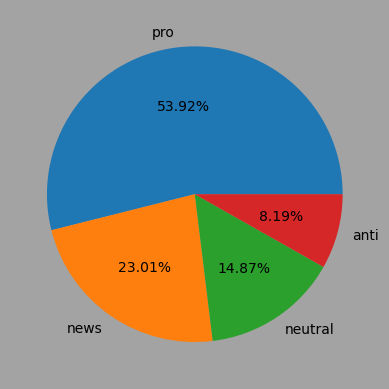

In [126]:
pie_x = df.sentiment.value_counts()
labels = df.sentiment.unique()


# Define the label mapping dictionary
label_mapping = {1: 'pro', 2: 'news', 0: 'neutral', -1: 'anti'}

# Create a vectorized function to apply the mapping
vfunc = np.vectorize(lambda x: label_mapping[x])

# Apply the mapping to the labels
mapped_labels = vfunc(labels)
print(mapped_labels)

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(df['sentiment'].value_counts(),autopct='%0.2f%%', labels = mapped_labels)
plt.show()

#### Observation: 

- from the bar graph above, we can deduce that we have 4 groups of sentiments.
- the sentiment is imbalanced

### let explore the tweets to generate insights

#### To create a word cloud we first need to tokenize the tweets, lemmatize or stem the words and then join all as single sentences to create the word cloud

- The word cloud will be divided into two groups one for people who believe in the effect of climate change and the other for those who do not beleieve

In [127]:
# import the word tokenizer to tokenize the twts, and lemmatizer to find the root word of the words in each message
# from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet

In [128]:
#Initialise the lemmatizer
lemma = WordNetLemmatizer()

# # Define a function to lemmatize a single tweet
# def lemmatize_tweet(tweet):
    
#     # Lemmatize each word and join them back into a single string
#     lemmatized_words = [lemma.lemmatize(twt) for twt in tweet]
#     lemmatized_tweet = ' '.join(lemmatized_words)

#     return lemmatized_tweet

def lemmatize_tweet(df):
    df["length"] = df["message"].str.len()
    df["tokenized"] = df["message"].apply(word_tokenize)
    df["parts-of-speech"] = df["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    
    df["parts-of-speech"] = df["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    df["clean_tweet"] = df["parts-of-speech"].apply(
        lambda tokens: [lemma.lemmatize(word, tag) for word, tag in tokens]
    )
    df["clean_tweet"] = df["clean_tweet"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return df

In [129]:
# df['clean_tweet'] = df['message'].apply(lemmatize_tweet)
df = lemmatize_tweet(df)

In [130]:
df_test = lemmatize_tweet(df_test)

In [131]:
df.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,102,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,61,"[its, not, like, we, lack, evidence, of, anthr...","[(its, n), (not, r), (like, n), (we, n), (lack...",it not like we lack evidence of anthropogenic ...
2,2,researchers say we have three years to act o...,698562,84,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say we have three year to act on cl...
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,73,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[(todayinmaker, n), (wired, v), (2016, n), (wa...",todayinmaker wire 2016 be a pivotal year in th...
4,1,its 2016 and a racist sexist climate change ...,466954,97,"[its, 2016, and, a, racist, sexist, climate, c...","[(its, n), (2016, n), (and, n), (a, n), (racis...",it 2016 and a racist sexist climate change den...


#### We removed the stop words from the clean_tweets before drawing our wordcloud

In [132]:
# create a function that removes stop words
def remove_stopwords(text):
    
    # create a set containing the stopwords we wish to remove
    stop_words = set(stopwords.words('english'))
    
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop_words:
            y.append(i)
            
    return " ".join(y)

In [133]:
df['clean_tweet'] = df['clean_tweet'].apply(remove_stopwords)
df.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,102,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,61,"[its, not, like, we, lack, evidence, of, anthr...","[(its, n), (not, r), (like, n), (we, n), (lack...",like lack evidence anthropogenic global warming
2,2,researchers say we have three years to act o...,698562,84,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say three year act climate change late
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,73,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[(todayinmaker, n), (wired, v), (2016, n), (wa...",todayinmaker wire 2016 pivotal year war climat...
4,1,its 2016 and a racist sexist climate change ...,466954,97,"[its, 2016, and, a, racist, sexist, climate, c...","[(its, n), (2016, n), (and, n), (a, n), (racis...",2016 racist sexist climate change deny bigot l...


In [134]:
df_test.clean_tweet = df_test.clean_tweet.apply(remove_stopwords)
df_test.head()

,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,europe will now be looking to china to make su...,169760,97,"[europe, will, now, be, looking, to, china, to...","[(europe, n), (will, n), (now, r), (be, v), (l...",europe look china make sure alone fight climat...
1,combine this with the polling of staffers re c...,35326,107,"[combine, this, with, the, polling, of, staffe...","[(combine, n), (this, n), (with, n), (the, n),...",combine polling staffer climate change womens ...
2,the scary unimpeachable evidence that climate ...,224985,100,"[the, scary, unimpeachable, evidence, that, cl...","[(the, n), (scary, a), (unimpeachable, a), (ev...",scary unimpeachable evidence climate change al...
3,\r\nputin got to you too jill \r\ntrump d...,476263,100,"[putin, got, to, you, too, jill, trump, doesnt...","[(putin, n), (got, v), (to, n), (you, n), (too...",putin get jill trump doesnt believe climate ch...
4,female orgasms cause global warming\r\nsarca...,872928,59,"[female, orgasms, cause, global, warming, sarc...","[(female, a), (orgasms, n), (cause, v), (globa...",female orgasm cause global warming sarcastic r...


### Generate the wordcloud for all words in the messages

In [135]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [136]:
# visualize the frequent words using wordcloud
all_words = " ".join([sentence for sentence in df['clean_tweet']])

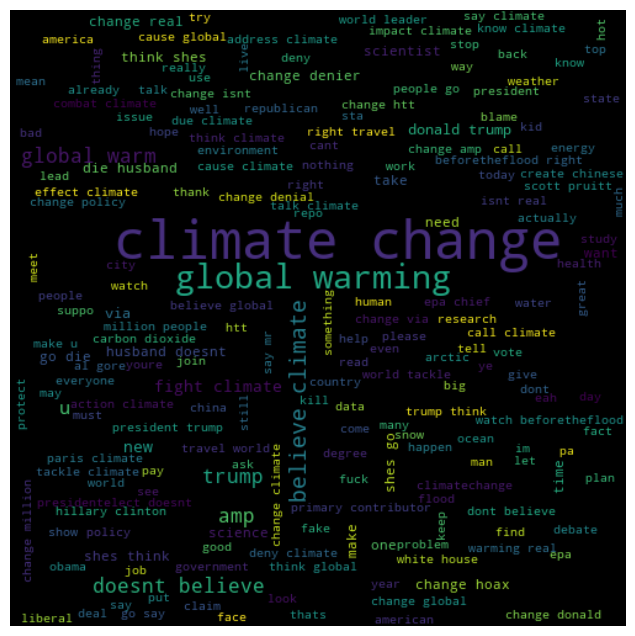

In [137]:
wordcloud_gen = wc.generate(all_words)
# plot the graph
plt.figure(figsize=(18,8))
plt.imshow(wordcloud_gen, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Sentiment 1: The tweets that support the belief of man-made climate change

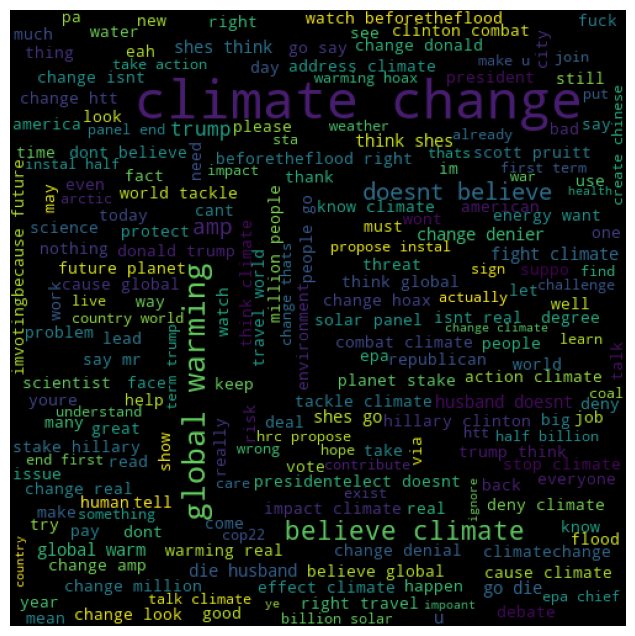

In [138]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 1]['clean_tweet'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Sentiment 2: The tweets that link to factual news about climate change

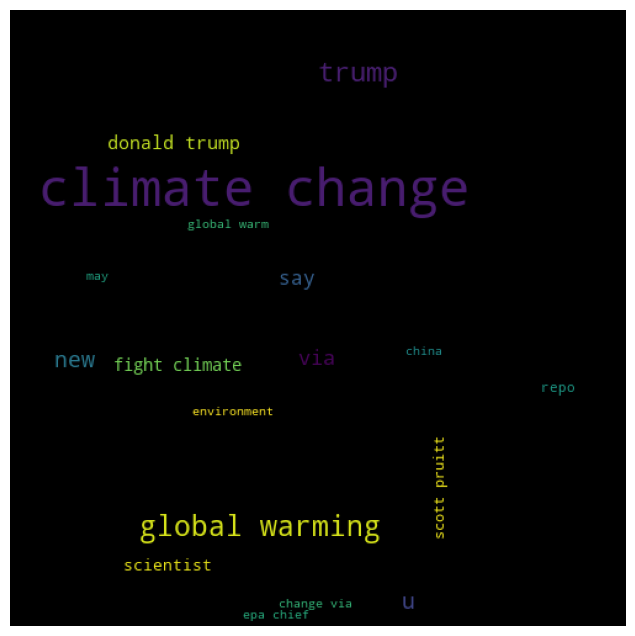

In [139]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 2]['clean_tweet'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Sentiment 0: The tweets that neither support nor refute the belief of man-made climate change

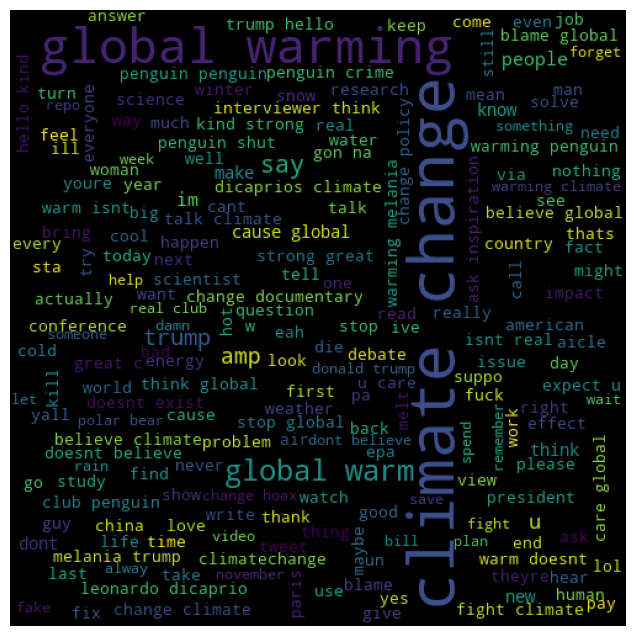

In [140]:
ptv_sentiment = wc.generate(df[df['sentiment'] == 0]['clean_tweet'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### Sentiment -1 Anti: The tweets that do not believe in man-made climate change 

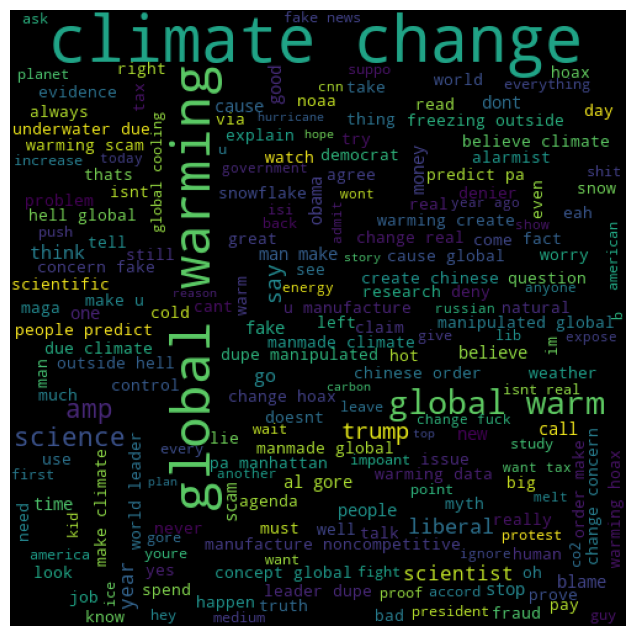

In [141]:
ptv_sentiment = wc.generate(df[df['sentiment'] == -1]['clean_tweet'].str.cat(sep = " "))
plt.figure(figsize=(18,8))
plt.imshow(ptv_sentiment)
plt.axis('off')
plt.show()

#### We checked the top ten most common words for each class of tweet

In [142]:
# Converting tweet messages to a List of words and extracting the top 10 words


# top 10 word for Sentiment 2 (linked to factual news) tweets
twts = df[df['sentiment'] == 2]['clean_tweet'].str.cat(sep= " ")
climate_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
twt_top_10words = pd.DataFrame(Counter(climate_twt).most_common(10))
twt_top_10words.head()

,0,1
0,climate,3350
1,change,3276
2,trump,1023
3,global,507
4,warming,357


## Bar plot of top 10 words in Sentiment 2 tweets (linked to factual news) 

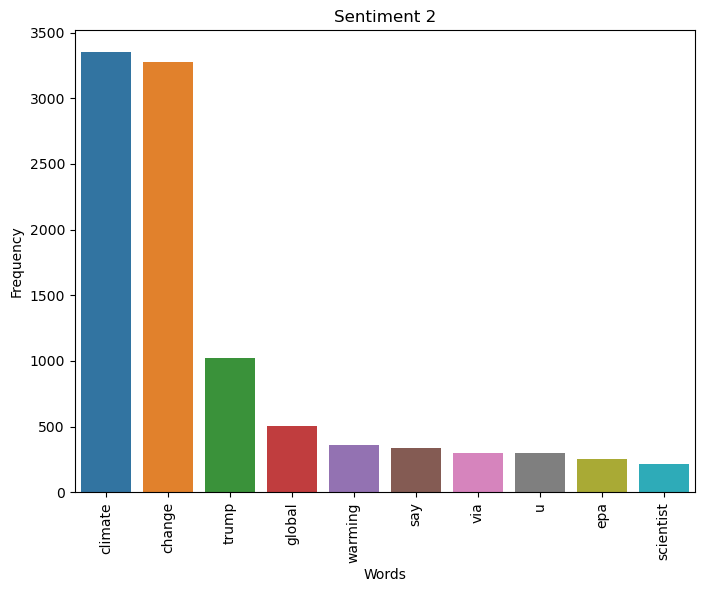

In [143]:
#plot bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x= twt_top_10words[0], y= twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')
plt.title('Sentiment 2')  
plt.show()

In [144]:
# top 10 word for sentiment 1 tweets(pro) 
twts = df[df['sentiment'] == 1]['clean_tweet'].str.cat(sep= " ")
anti_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
anti_twt_top_10words = pd.DataFrame(Counter(anti_twt).most_common(10))
anti_twt_top_10words.head()

,0,1
0,climate,7366
1,change,7207
2,global,1597
3,warming,1165
4,believe,1118


## Bar plot of top 10 words in Sentiment 1 tweets (Pro)

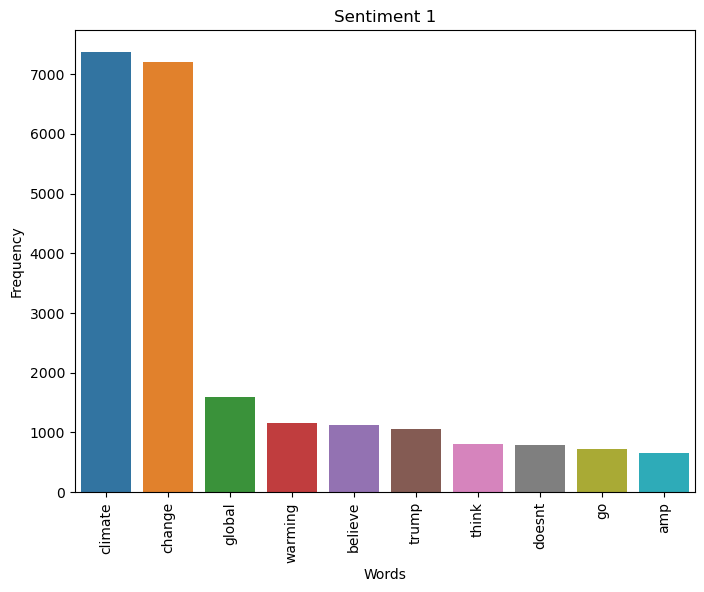

In [145]:
# plot a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x= anti_twt_top_10words[0], y= anti_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.title('Sentiment 1')
plt.show()

In [146]:
# top 10 word for sentiment 0 tweets (Neutral)
twts = df[df['sentiment'] == 0]['clean_tweet'].str.cat(sep= " ")
anti_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
news_twt_top_10words = pd.DataFrame(Counter(anti_twt).most_common(10))
news_twt_top_10words.head()

,0,1
0,climate,1444
1,change,1415
2,global,1039
3,warming,819
4,warm,198


## Bar plot of top 10 words in Sentiment 0 tweets (Neutral)

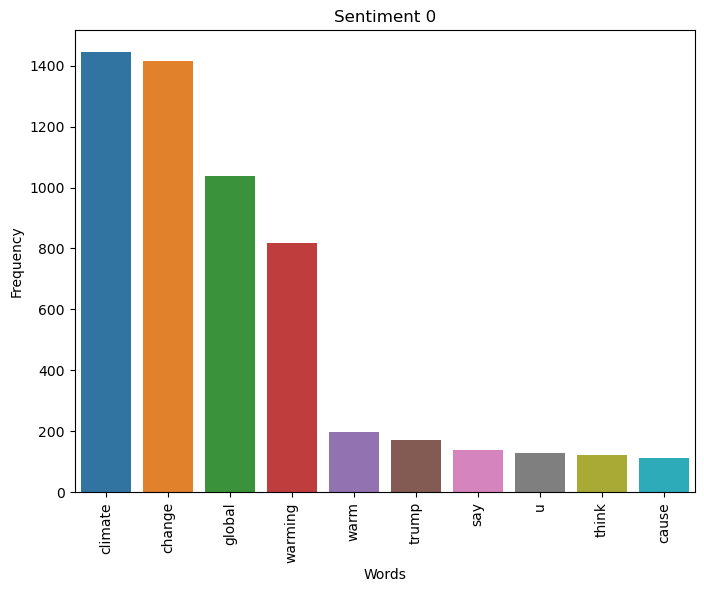

In [147]:
# plot a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x= news_twt_top_10words[0], y= news_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.title('Sentiment 0')
plt.show()

In [148]:
# top 10 word for sentiment -1 tweets (Anti)
twts = df[df['sentiment'] == -1]['clean_tweet'].str.cat(sep= " ")
neutral_twt = twts.split()


# Counting Top 10 Words in each tweet message

from collections import Counter
neutral_twt_top_10words = pd.DataFrame(Counter(neutral_twt).most_common(10))
neutral_twt_top_10words.head()

,0,1
0,climate,800
1,change,774
2,global,635
3,warming,475
4,warm,141


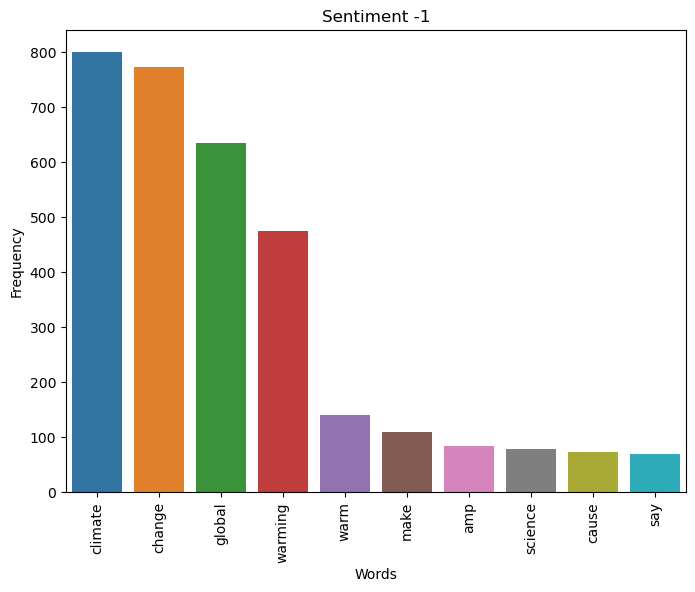

In [149]:
# plot a bar plot

plt.figure(figsize=(8, 6))
sns.barplot(x = neutral_twt_top_10words[0], y= neutral_twt_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.title('Sentiment -1')
plt.show()

### Insights from the EDA

- Among the observed data, approximately 53.92% express belief in man-made climate change.
- Approximately 23.01% of the observed data links to factual news about climate change.
- Around 15% of the observed data exhibit a neutral stance towards climate change.
- Approximately 8% of the observed data express disbelief in man-made climate change.
- Based on the generated word clouds, the term "climate change" emerges as the most frequently used word across all sentiment types.
- The name "Trump" appears as a prominent influencer in discussions related to climate change.
- We have observed a significant increase in the popularity of the idea of climate change, as evidenced by a considerable number of tweets expressing support for climate change.
- Climate change is increasingly influencing consumer preferences and product choices. Therefore, there is a need to develop a sentiment analysis model to analyze the sentiment of Twitter users' messages about climate change.

## 4. Feature Engineering


| In this section, we extract features from the text data and tranform them into the appropriate format for training our model. |
---

<!-- #### For the sentiment classes, we'll map the 4 classes into 2 classes for the classification- pro tweets and the news tweets for 1 and the neutral and anti-tweet for 0 -->

<!-- The mapping used in the code snippet is assigning a binary encoding to the sentiment class in the DataFrame. It maps the sentiment values of 2 and 1 to 1, indicating a positive sentiment or belief in climate change. Similarly, it maps the sentiment values of 0 and -1 to 0, indicating a neutral or negative sentiment or disbelief in climate change.

The theory behind this mapping could be based on the assumption that sentiment classes 2 and 1, which represent tweets that support the belief of man-made climate change, can be considered as positive sentiments towards climate change. Hence, they are encoded as 1. On the other hand, sentiment classes 0 and -1, which represent tweets that neither support nor refute the belief of man-made climate change or tweets that do not believe in man-made climate change, can be considered as neutral or negative sentiments. Hence, they are encoded as 0.

By creating the 'belief' column with this mapping, it provides a simplified binary representation of the sentiment classes that can be used for further analysis or modeling tasks where a binary classification approach is desired. -->

In [150]:
#df_new = df.copy()

In [151]:
df_new = df

In [152]:
df_new.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,102,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,61,"[its, not, like, we, lack, evidence, of, anthr...","[(its, n), (not, r), (like, n), (we, n), (lack...",like lack evidence anthropogenic global warming
2,2,researchers say we have three years to act o...,698562,84,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say three year act climate change late
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,73,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[(todayinmaker, n), (wired, v), (2016, n), (wa...",todayinmaker wire 2016 pivotal year war climat...
4,1,its 2016 and a racist sexist climate change ...,466954,97,"[its, 2016, and, a, racist, sexist, climate, c...","[(its, n), (2016, n), (and, n), (a, n), (racis...",2016 racist sexist climate change deny bigot l...


In [153]:
# Load the dataset into a DataFrame

# Create a new column 'sentiment' based on the mapping
#df_new['sentiment'] = df_new['sentiment'].map({2: 1, 1: 1, 0: 0, -1: 0})

#df_new.head()


In [154]:
pie_x_new = df_new.sentiment.value_counts() # to check if the data balances between the pro and the anti
pie_x_new

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

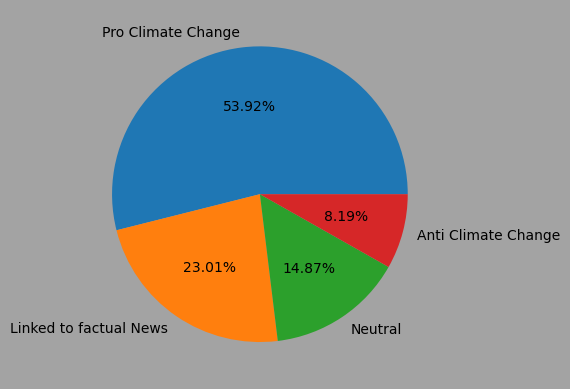

In [155]:
pie_x_new = df_new.sentiment.value_counts()
labels_new = df_new.sentiment.unique()


# Define the label mapping dictionary
label_mapping_new = {1 : 'Pro Climate Change', -1 : 'Anti Climate Change', 0 : 'Neutral', 2 : 'Linked to factual News'}

# Create a vectorized function to apply the mapping
vfunc_new = np.vectorize(lambda x: label_mapping_new[x])

# Apply the mapping to the labels
mapped_labels_new = vfunc_new(labels_new)

# Remove the white background
plt.figure().set_facecolor('#A3A3A3')
plt.pie(pie_x_new ,autopct='%0.2f%%', labels = mapped_labels_new)
plt.show()

#### the pro greatly superceeds the the anti climate tweet which signifies data inbalance

In [156]:
df_new.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,102,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,61,"[its, not, like, we, lack, evidence, of, anthr...","[(its, n), (not, r), (like, n), (we, n), (lack...",like lack evidence anthropogenic global warming
2,2,researchers say we have three years to act o...,698562,84,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say three year act climate change late
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,73,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[(todayinmaker, n), (wired, v), (2016, n), (wa...",todayinmaker wire 2016 pivotal year war climat...
4,1,its 2016 and a racist sexist climate change ...,466954,97,"[its, 2016, and, a, racist, sexist, climate, c...","[(its, n), (2016, n), (and, n), (a, n), (racis...",2016 racist sexist climate change deny bigot l...


In [157]:
# Assigning the features and the labels

X = df_new.clean_tweet
#X = X.reshape(-1, 1) # reshape X to have 2 dimensions

y = df_new.sentiment

In [158]:
X

0        polyscimajor epa chief doesnt think carbon dio...
1          like lack evidence anthropogenic global warming
2        researcher say three year act climate change late
3        todayinmaker wire 2016 pivotal year war climat...
4        2016 racist sexist climate change deny bigot l...
                               ...                        
15814    take material global warm lgbt right health ca...
15815    climate change could break 200millionyearold r...
15816    notiven nytimesworld trump actually believe cl...
15817    hey liberals climate change crap hoax tie agen...
15818                climate change equation 4 screenshots
Name: clean_tweet, Length: 15819, dtype: object

In [159]:
y.isnull().sum()

0

In [160]:
c = Counter(y) # count the values in the labels
c

Counter({1: 8530, 2: 3640, 0: 2353, -1: 1296})

In [161]:
# # Define the pipeline
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# # Define the vectorizers
# tfidf_vectorizer = TfidfVectorizer(max_features=4000)
# count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=4000, stop_words='english')

# # Define the pipeline
# pipeline = Pipeline([
#     ('vectorizer', FeatureUnion([
#         ('tfidf', tfidf_vectorizer),
#         ('count', count_vectorizer)
#     ]))])

# # Fit and transform the data using the pipeline
# X_vectorized = pipeline.fit_transform(X_list)

In [162]:
# Convert the input data to a list of strings

#X_ROS_list = [str(x) for x in X_ROS]

In [169]:
# Split the data set to training and validation data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building and Evaluation

**we'll make use of the countvectorizer and TfidfTransformer for feature transformation on our tweets and converting it to binary array for our classifier**

In [86]:
# we'll use the pipeline module to combine both transformation and classifiers at a go?

from sklearn.pipeline import Pipeline, FeatureUnion # pipeline and FeatureUnion for concatenating both type of transformers features to read information captured by both transformers
from sklearn.feature_extraction.text import TfidfVectorizer # Tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer # countvectorizer
from sklearn.svm import SVC  # SVM classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classifier
from lightgbm import LGBMClassifier  # LightGBM classifier

from sklearn.metrics import accuracy_score, f1_score, classification_report # evaluation metric

### First Model - SVC

**Use the sklearn pipeline module to link the transformation and feature extraction together**

In [67]:
# Define the pipeline steps

count_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=4000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
svm_classifier = SVC(kernel='rbf')

svc_steps = [
    ('feature_union', FeatureUnion([
        ('count_vectorizer', count_vectorizer),
        ('tfidf_vectorizer', tfidf_vectorizer)
    ])),
    ('classifier', svm_classifier)
]

# Create the pipeline
svc_pipe = Pipeline(svc_steps)

# Fit the pipeline to the training data
svc_pipe.fit(X_train, y_train)

# Evaluate on the test data
accuracy = svc_pipe.score(X_test, y_test)

# Make predictions on the testing data
y_pred_svc = svc_pipe.predict(X_test)


# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_svc)
print(accuracy)

0.7281921618204804


In [68]:
svc_pipe_report = classification_report(y_test, y_pred_svc)
print("\n\nClassification Report:\n\n", svc_pipe_report)



Classification Report:

               precision    recall  f1-score   support

          -1       0.83      0.26      0.39       278
           0       0.64      0.34      0.45       425
           1       0.72      0.91      0.81      1755
           2       0.76      0.69      0.73       706

    accuracy                           0.73      3164
   macro avg       0.74      0.55      0.59      3164
weighted avg       0.73      0.73      0.70      3164



**Built another model using the tfidfvectorizer()**

In [179]:
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
svm_classifier = SVC(kernel='rbf')

svc_steps_tfidf = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', svm_classifier)
]

# Create the pipeline
svc_pipe_ = Pipeline(svc_steps_tfidf)

In [180]:
svc_pipe_.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', SVC())])

In [181]:
svc_pipe_pred = svc_pipe_.predict(X_test)

In [182]:
svc_pipe_pred

array([1, 2, 1, ..., 1, 1, 2], dtype=int64)

In [175]:
# created a function to calculate the accuracy score

def calculate_accuracy(clf, X_test, y_test):
    #your code here
    
    # use the trained model to carry out prediction
    y_pred = clf.predict(X_test)
    
    # check for accuracy
    acc = accuracy_score(y_test, y_pred)
    print(acc)

In [183]:
accuracy = calculate_accuracy(svc_pipe_, X_test, y_test)
accuracy

0.7348293299620733


In [184]:
rep = classification_report(y_test, svc_pipe_pred)
print("\n\nClassification Report:\n\n", rep)



Classification Report:

               precision    recall  f1-score   support

          -1       0.87      0.29      0.44       278
           0       0.70      0.32      0.44       425
           1       0.72      0.92      0.81      1755
           2       0.79      0.69      0.74       706

    accuracy                           0.73      3164
   macro avg       0.77      0.56      0.61      3164
weighted avg       0.74      0.73      0.71      3164



In [58]:
# created a function to get the class report for each model created

def get_class_report(clf, X_test, y_test):
    #your code here
    
    # create the predictions
    y_pred = clf.predict(X_test)
    
    # create the report
    report = classification_report(y_test, y_pred)
    
    return report
    


In [77]:
print("\n\nClassification Report:\n\n", get_class_report(svc_pipe_tfidf, X_test, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.87      0.29      0.44       278
           0       0.70      0.32      0.44       425
           1       0.72      0.92      0.81      1755
           2       0.79      0.69      0.74       706

    accuracy                           0.73      3164
   macro avg       0.77      0.56      0.61      3164
weighted avg       0.74      0.73      0.71      3164



In [78]:
daf = pd.DataFrame(svc_pipe_tfidf_pred, columns=['sentiment'])
daf.head()

,sentiment
0,1
1,2
2,1
3,1
4,0


In [79]:
daf.shape

(3164, 1)

In [80]:
df_test.shape

(10546, 6)

### RandomforestClassifier

In [81]:
# Building the random forest classifier

forest = RandomForestClassifier()   # initialiize the forest classifier


forest_steps = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', forest)
]

# Create the pipeline
forest_pipe = Pipeline(forest_steps)

In [82]:
# train the model
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', RandomForestClassifier())])

In [83]:
pred_forest = forest_pipe.predict(X_test) # make prediction on the test data for validation

In [84]:
pred_forest

array([1, 2, 1, ..., 1, 1, 0], dtype=int64)

In [85]:
print("\n\nClassification Report:\n\n", get_class_report(forest_pipe, X_test, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.82      0.20      0.32       278
           0       0.61      0.33      0.43       425
           1       0.70      0.89      0.78      1755
           2       0.72      0.64      0.68       706

    accuracy                           0.70      3164
   macro avg       0.71      0.51      0.55      3164
weighted avg       0.70      0.70      0.67      3164



**Parameter Grid Search for RandomForestClassifier()**

In [86]:
# import the model selection gridsearchcv modeule from the sklearn package
from sklearn.model_selection import GridSearchCV

In [87]:
# Define the parameter grid for grid search
param_grid = {
    'vectorizer__max_features': [2000, 4000, 6000],  # Vary the max_features parameter of TfidfVectorizer
    'classifier__n_estimators': [100, 200, 300],  # Vary the number of estimators in RandomForestClassifier
    'classifier__max_depth': [None, 5, 10]  # Vary the maximum depth of the trees in RandomForestClassifier
}

# create the pipe
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
acc_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n\nClassification Report:\n\n", acc_report)

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 300, 'vectorizer__max_features': 6000}
Best Score: 0.6894508099565388
Accuracy: 0.6994310998735778


Classification Report:

               precision    recall  f1-score   support

          -1       0.85      0.21      0.33       278
           0       0.57      0.33      0.42       425
           1       0.70      0.89      0.78      1755
           2       0.73      0.65      0.69       706

    accuracy                           0.70      3164
   macro avg       0.71      0.52      0.55      3164
weighted avg       0.70      0.70      0.67      3164



### KNN classifier

In [88]:
# Building the random knn classifier

kclf = KNeighborsClassifier()   # initialiize the forest classifier


kclf_steps = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', kclf)
]

# Create the pipeline
knn_pipe = Pipeline(kclf_steps)

In [89]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', KNeighborsClassifier())])

In [90]:
y_pred_knn = knn_pipe.predict(X_test)
print(y_pred_knn)
print("\n\nClassification Report:\n\n", get_class_report(knn_pipe, X_test, y_test))

[1 1 1 ... 2 0 1]


Classification Report:

               precision    recall  f1-score   support

          -1       0.47      0.36      0.41       278
           0       0.36      0.47      0.41       425
           1       0.73      0.72      0.72      1755
           2       0.64      0.62      0.63       706

    accuracy                           0.63      3164
   macro avg       0.55      0.54      0.54      3164
weighted avg       0.64      0.63      0.63      3164



### LightGBM classifier model

In [91]:
# initialize the model object?

lgb = LGBMClassifier()

lgb_steps = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', lgb)
]

# Create the pipeline
lgbclf_pipe = Pipeline(lgb_steps)

In [92]:
# train the model by fitting the training data to the classifier

lgbclf_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(max_features=4000)),
                ('classifier', LGBMClassifier())])

In [93]:
y_lgb_predict = lgbclf_pipe.predict(X_test)
print(y_lgb_predict)
print("\n\nClassification Report:\n\n", get_class_report(lgbclf_pipe, X_test, y_test))

[1 2 1 ... 1 1 2]


Classification Report:

               precision    recall  f1-score   support

          -1       0.67      0.32      0.43       278
           0       0.54      0.37      0.44       425
           1       0.72      0.86      0.78      1755
           2       0.70      0.66      0.68       706

    accuracy                           0.70      3164
   macro avg       0.66      0.55      0.58      3164
weighted avg       0.69      0.70      0.68      3164



**Lets perform a grid search to find the best parameters**

In [94]:
# Define the parameter grid
param_grid = {
    'tfidf_vectorizer__max_features': [2000, 4000, 6000],  # Vary the max_features parameter of TfidfVectorizer
    'classifier__n_estimators': [100, 200, 300],  # Vary the number of estimators in LGBMClassifier
    'classifier__max_depth': [None, 5, 10]  # Vary the maximum depth of the trees in LGBMClassifier
}

# Create the pipeline
lgb_steps = [
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('classifier', LGBMClassifier())
]
lgbclf_pipe = Pipeline(lgb_steps)

# Perform grid search
grid_search = GridSearchCV(lgbclf_pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200, 'tfidf_vectorizer__max_features': 2000}
Best Score: 0.6865270644014225


Classification Report:

               precision    recall  f1-score   support

          -1       0.61      0.34      0.44       278
           0       0.53      0.42      0.47       425
           1       0.74      0.84      0.79      1755
           2       0.70      0.67      0.68       706

    accuracy                           0.70      3164
   macro avg       0.64      0.57      0.59      3164
weighted avg       0.69      0.70      0.69      3164



**Now that we've gotten the model with the best performance on unseen data, lets apply some imbalance method to balance the data and source for a completely different data to validate the performance of our model**

In [95]:
t_vect = TfidfVectorizer(max_features=4000)

In [96]:
# Fit the vectorizer to the text data and transform the text into TF-IDF vectors
t_vect.fit(X_train)
X_train_vect = t_vect.transform(X_train)

# Transform the test data into TF-IDF vectors using the fitted vectorizer
X_test_vect = t_vect.transform(X_test)

In [97]:
X_test_vect.shape

(3164, 4000)

In [98]:
X_train_vect.shape

(12655, 4000)

In [99]:
Counter(y_train)

Counter({1: 6775, 2: 2934, 0: 1928, -1: 1018})

**Lets treat the data imbalance to see how it does improves our model**

In [100]:
from imblearn.over_sampling import SMOTE, ADASYN

# Create an instance of SMOTE
smote = SMOTE()

# Perform SMOTE oversampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vect, y_train)

In [101]:
X_train_resampled.shape

(27100, 4000)

In [102]:
X_test_vect.shape

(3164, 4000)

In [103]:
Counter(y_train_resampled)

Counter({1: 6775, 2: 6775, 0: 6775, -1: 6775})

**Svc classifier**

In [104]:
svc_l = SVC(kernel = 'linear')
svc_rbf = SVC(kernel = 'rbf')

In [105]:
svc_l.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [106]:
svc_l.score(X_train_resampled, y_train_resampled)

0.9054981549815498

In [107]:
print("\n\nClassification Report:\n\n", get_class_report(svc_l, X_test_vect, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.43      0.57      0.49       278
           0       0.40      0.54      0.46       425
           1       0.82      0.67      0.74      1755
           2       0.68      0.75      0.71       706

    accuracy                           0.66      3164
   macro avg       0.58      0.63      0.60      3164
weighted avg       0.70      0.66      0.67      3164



In [108]:
svc_rbf.fit(X_train_resampled, y_train_resampled)

print("\n\nClassification Report:\n\n", get_class_report(svc_rbf, X_test_vect, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.79      0.36      0.50       278
           0       0.64      0.34      0.44       425
           1       0.73      0.91      0.81      1755
           2       0.79      0.71      0.75       706

    accuracy                           0.74      3164
   macro avg       0.74      0.58      0.62      3164
weighted avg       0.74      0.74      0.72      3164



**LGBMClassifier**

In [109]:
model = LGBMClassifier()

In [110]:
model.fit(X_train_resampled, y_train_resampled)

LGBMClassifier()

In [111]:
print("\n\nClassification Report:\n\n", get_class_report(model, X_test_vect, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.61      0.46      0.52       278
           0       0.45      0.50      0.48       425
           1       0.78      0.75      0.77      1755
           2       0.65      0.73      0.69       706

    accuracy                           0.69      3164
   macro avg       0.62      0.61      0.61      3164
weighted avg       0.69      0.69      0.69      3164



**Grid search for the best parameter for lgbmclassifier**

In [112]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127]
}

# Create the LGBMClassifier
lgbm = LGBMClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 63}
Best Score: 0.8161623616236163


In [113]:
grid_search.best_estimator_

LGBMClassifier(max_depth=7, n_estimators=300, num_leaves=63)

In [114]:
# lets make prediction to see how it performs on the test data

print("\n\nClassification Report:\n\n", get_class_report(grid_search, X_test_vect, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.62      0.41      0.49       278
           0       0.44      0.47      0.45       425
           1       0.77      0.76      0.77      1755
           2       0.65      0.73      0.69       706

    accuracy                           0.69      3164
   macro avg       0.62      0.59      0.60      3164
weighted avg       0.69      0.69      0.68      3164



**Support Vector Classifier Using the kernel = 'rbf'**

In [115]:
svm = SVC(kernel='rbf')

svm.fit(X_train_resampled, y_train_resampled)
print("\n\nClassification Report:\n\n", get_class_report(svm, X_test_vect, y_test))



Classification Report:

               precision    recall  f1-score   support

          -1       0.79      0.36      0.50       278
           0       0.64      0.34      0.44       425
           1       0.73      0.91      0.81      1755
           2       0.79      0.71      0.75       706

    accuracy                           0.74      3164
   macro avg       0.74      0.58      0.62      3164
weighted avg       0.74      0.74      0.72      3164



**Lets perform a grid search to get the best hyperparameters from the svc using the kernel of rbf**

In [116]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Create the GridSearchCV object
svm_grid_ = GridSearchCV(svm, param_grid, cv=3)

# Fit the GridSearchCV object to the data
svm_grid_.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 63}
Best Score: 0.8161623616236163


In [118]:
pred_ = svm_grid_.predict(X_test_vect)

In [120]:
print("\n\nClassification Report:\n\n", classification_report(y_test, pred_))

/n/n/Accuracy repor/n/n:                precision    recall  f1-score   support

          -1       1.00      0.12      0.21       278
           0       0.89      0.11      0.20       425
           1       0.61      0.99      0.75      1755
           2       0.92      0.31      0.46       706

    accuracy                           0.64      3164
   macro avg       0.86      0.38      0.41      3164
weighted avg       0.75      0.64      0.57      3164



## Drop the tweets that are news and neutral from the data set

**Intuiution**

Since the goal of this project is to detect if a tweet is either Pro climate change or anit climate change, we are going to drop the neutral tweet and news tweet and see how our model performs

In [122]:
df_new.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,102,"[polyscimajor, epa, chief, doesnt, think, carb...","[(polyscimajor, a), (epa, n), (chief, n), (doe...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,61,"[its, not, like, we, lack, evidence, of, anthr...","[(its, n), (not, r), (like, n), (we, n), (lack...",like lack evidence anthropogenic global warming
2,2,researchers say we have three years to act o...,698562,84,"[researchers, say, we, have, three, years, to,...","[(researchers, n), (say, v), (we, n), (have, v...",researcher say three year act climate change late
3,1,todayinmaker wired 2016 was a pivotal year in...,573736,73,"[todayinmaker, wired, 2016, was, a, pivotal, y...","[(todayinmaker, n), (wired, v), (2016, n), (wa...",todayinmaker wire 2016 pivotal year war climat...
4,1,its 2016 and a racist sexist climate change ...,466954,97,"[its, 2016, and, a, racist, sexist, climate, c...","[(its, n), (2016, n), (and, n), (a, n), (racis...",2016 racist sexist climate change deny bigot l...


In [123]:
max_num_words = df_new.length.max()
max_num_words

145

In [124]:
data = df_new.loc[(df['sentiment'] == 1) | (df_new['sentiment'] == -1)]
data['sentiment'].value_counts()

 1    8530
-1    1296
Name: sentiment, dtype: int64

In [125]:
X_n = data['clean_tweet']

In [126]:
y_n = data['sentiment']

In [127]:
Counter(y_n)

Counter({1: 8530, -1: 1296})

In [128]:
y_n = y_n.replace(-1, 0)

In [129]:
# Convert sentiment labels to numpy array
y_n = np.array(y_n)

In [130]:
y_n

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [131]:
Counter(y_n)

Counter({1: 8530, 0: 1296})

# Consider exploring additional data sources to enhance the robustness of our analysis

### Observation from the Models

Since all the model performed well in predicting the Pro sentiments, we need to source for more data to train our model

In [3]:
d__ = pd.read_csv('twitter_sentiment_data.csv')

In [4]:
d__.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


## Preprocessing

In [59]:
# remove punction marks, urls, # tags
d__.message = d__.message.apply(clean_tweet)

# remove the rt
d__.message = d__.message.apply(remove_rt)

# remove the non english words
d__.message = d__.message.apply(remove_non_ascii)

# lemmatize the tweet
d__ = lemmatize_tweet(d__)

d__.head()

,sentiment,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,-1,climate change is an interesting hustle as it...,792927353886371840,126,"[climate, change, is, an, interesting, hustle,...","[(climate, n), (change, n), (is, v), (an, n), ...",climate change be an interesting hustle a it b...
1,1,watch beforetheflood right here as travels ...,793124211518832641,85,"[watch, beforetheflood, right, here, as, trave...","[(watch, n), (beforetheflood, n), (right, r), ...",watch beforetheflood right here a travel the w...
2,1,fabulous leonardo dicaprios film on climate ch...,793124402388832256,78,"[fabulous, leonardo, dicaprios, film, on, clim...","[(fabulous, a), (leonardo, n), (dicaprios, n),...",fabulous leonardo dicaprios film on climate ch...
3,1,just watched this amazing documentary by leo...,793124635873275904,96,"[just, watched, this, amazing, documentary, by...","[(just, r), (watched, v), (this, n), (amazing,...",just watch this amazing documentary by leonard...
4,2,pranita biswasi a lutheran from odisha gives...,793125156185137153,117,"[pranita, biswasi, a, lutheran, from, odisha, ...","[(pranita, a), (biswasi, n), (a, n), (lutheran...",pranita biswasi a lutheran from odisha give te...


In [60]:
d__.clean_tweet = d__.clean_tweet.apply(remove_stopwords)

In [61]:
def remove_numbers(text):
    # Define the regex pattern to match numeric characters
    pattern = r'\d+'
    
    # Use the regex pattern to remove numbers from the text
    text_without_numbers = re.sub(pattern, '', text)
    
    return text_without_numbers

In [62]:
# remove numerical data from the text data
d__.clean_tweet = d__.clean_tweet.apply(remove_numbers)

In [63]:
d__.clean_tweet

0        climate change interesting hustle global warmi...
1        watch beforetheflood right travel world tackle...
2        fabulous leonardo dicaprios film climate chang...
3        watch amazing documentary leonardodicaprio cli...
4        pranita biswasi lutheran odisha give testimony...
                               ...                        
43938    dear yeah right human mediate climate change c...
43939    respective pay prevent climate change globally...
43940       un poll show climate change low global concern
43941    still canqt believe gif taehyung save human ra...
43942    wealthy fossil fuel industry know climate chan...
Name: clean_tweet, Length: 43943, dtype: object

### Feature extraction using the tfidfvectorization

In [92]:
_vect = TfidfVectorizer(max_features=4000) # initialize the vectorizer

In [93]:
__X = d__.clean_tweet
__y = d__.sentiment

In [94]:
_vect.fit(__X)

__X_vect = _vect.fit_transform(__X)

In [95]:
__X_vect.shape

(43943, 4000)

In [90]:
__y = np.array(__y)

In [82]:
feature_names = _vect.get_feature_names()
print(feature_names[:20])

['ab', 'abandon', 'abbott', 'abc', 'ability', 'able', 'aboion', 'aboions', 'abou', 'abraham', 'abrupt', 'abruptly', 'absolute', 'absolutely', 'absorb', 'abstract', 'absurd', 'abt', 'abuse', 'ac']


In [84]:
len(feature_names)

4000

In [83]:
Counter(__y)

Counter({-1: 3990, 1: 22962, 2: 9276, 0: 7715})

In [71]:
__y

array([-1,  1,  1, ...,  2,  0,  1], dtype=int64)

In [85]:
len(__y)

43943

In [96]:
print(__X_vect.shape)
print(__y.shape)

(43943, 4000)
(43943,)


## Model

**Train the model with the best performing model**

In [97]:
# Split the data into training and testing sets

# Create and fit the SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(__X_vect, __y)

SVC()

In [165]:
X_test = _vect.fit_transform(X_test)

In [166]:
X_test.shape

(3164, 4000)

In [167]:
_pred = svm_model.predict(X_test)

In [185]:
print("\n\nClassification Report:\n\n", classification_report(y_test, _pred))



Classification Report:

               precision    recall  f1-score   support

          -1       0.10      0.01      0.03       278
           0       0.12      0.04      0.06       425
           1       0.56      0.90      0.69      1755
           2       0.23      0.05      0.08       706

    accuracy                           0.52      3164
   macro avg       0.25      0.25      0.22      3164
weighted avg       0.39      0.52      0.41      3164



**Submmission**

In [273]:
df_test.head()

,message,tweetid,length,tokenized,parts-of-speech,clean_tweet
0,europe will now be looking to china to make su...,169760,97,"[europe, will, now, be, looking, to, china, to...","[(europe, n), (will, n), (now, r), (be, v), (l...",europe look china make sure alone fight climat...
1,combine this with the polling of staffers re c...,35326,107,"[combine, this, with, the, polling, of, staffe...","[(combine, n), (this, n), (with, n), (the, n),...",combine polling staffer climate change womens ...
2,the scary unimpeachable evidence that climate ...,224985,100,"[the, scary, unimpeachable, evidence, that, cl...","[(the, n), (scary, a), (unimpeachable, a), (ev...",scary unimpeachable evidence climate change al...
3,\r\nputin got to you too jill \r\ntrump d...,476263,100,"[putin, got, to, you, too, jill, trump, doesnt...","[(putin, n), (got, v), (to, n), (you, n), (too...",putin get jill trump doesnt believe climate ch...
4,female orgasms cause global warming\r\nsarca...,872928,59,"[female, orgasms, cause, global, warming, sarc...","[(female, a), (orgasms, n), (cause, v), (globa...",female orgasm cause global warming sarcastic r...


In [186]:
data = df_test.clean_tweet

In [187]:
pred_sent = svc_pipe_.predict(data)

In [188]:
sub = pd.DataFrame({"tweetid": df_test.tweetid, "sentiment": pred_sent})

In [189]:
sub.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [190]:
sub.to_csv("sub.csv", index = False, mode = 'w')

## Saving the model

**The best model is the svc_pipe_ because it generalized well with unseen data**

In [191]:
import pickle

In [192]:
# Save the model
with open('rave_model.pkl', 'wb') as file:
    pickle.dump(svc_pipe_, file)

In [193]:
# restoring model

with open('rave_model.pkl', 'rb') as file:
    rave_= pickle.load(file)

In [194]:
rave_.predict(X_test)

array([1, 2, 1, ..., 1, 1, 2], dtype=int64)

In [195]:
# save the vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)